<h1>Part 1</h1>

In [1]:
import numpy as np
import nashpy as nash
import math
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def exponential_weights(v, epsilon=1, h=1):
    """
    It gives suggestions to players for probabilities to pick actions given an array of previous payoffs 
    of those actions.

    Args:
      v: an array of payoffs for each action at a given turn
      epsilon: the learning rate
      h: the range of the payoffs
      
    Returns:
      weights: weights for each action at a given turn
      pi: optimal probabilities for picking each action at a given turn
    """
    V = np.cumsum(v, axis=1)
    weights = np.power((1 + epsilon), V[:, :-1]/h)
    # because we're referencing the previous column, the first
    # column of ones gets removed so we need to add it back
    weights = np.insert(weights, 0, np.ones(v.shape[0]), axis=1)
    pi = np.divide(weights, np.sum(weights, axis=0))
    return weights, pi

def nash_eq(A, B):
    """
    It takes in a matrix A and a matrix B, and returns the Nash equilibrium of the game defined by A and
    B
    
    Args:
      A: payoff matrix for player row
      B: payoff matrix for player column
    
    Returns:
      A list of tuples. Each tuple contains the row and column indices of the Nash equilibrium.
    """
    game = nash.Game(A, B)
    eq = game.support_enumeration()
    return eq

def generate_random_game():
    """
    It generates a random bimatrix game.
    
    Returns:
      A: 2x2 numpy array with integer values 0-9
      B: 2x2 numpy array with integer values 0-9
    """
    A = np.random.randint(0, 10, size=(2, 2))
    B = np.random.randint(0, 10, size=(2, 2))
    return A, B

# EW tests that return probabilities for all actions/rounds 
def test_exponential_weights(A, B, epsilon):
    """
    > We play the game 25 times, and at each round, we use the exponential weights algorithm to
    calculate the probability of each action, and then we pick an action randomly based on the
    probability. 
    
    We'll use the `test_exponential_weights` function
    
    Args
      A: payoff matrix for player A
      B: payoff matrix for player B
      epsilon: the learning rate

    Returns:
      pi_A: the probability of A taking each action in each round
      pi_B: the probability of A taking each action in each round
    """
    ROUNDS = 25
    payoffs_A = np.zeros([2, ROUNDS])
    payoffs_B = np.zeros([2, ROUNDS])
    for round in range(ROUNDS):
        _, pi_A = exponential_weights(payoffs_A[:, 0:round+1], epsilon, 10)
        _, pi_B = exponential_weights(payoffs_B[:, 0:round+1], epsilon, 10)
        action_A = random_pick(pi_A[:, round])
        action_B = random_pick(pi_B[:, round])
        payoffs_A[0][round] = A[0][action_B]
        payoffs_A[1][round] = A[1][action_B]
        payoffs_B[0][round] = B[action_A][0]
        payoffs_B[1][round] = B[action_A][1]
    _, pi_A = exponential_weights(payoffs_A, epsilon, 10)
    _, pi_B = exponential_weights(payoffs_B, epsilon, 10)
    return pi_A, pi_B

# randomly pick an index in the array according to the given probabilities in each element of the array
def random_pick(probability_array):
    """
    It generates a random number between 0 and 1, and then returns the index of the first element in the
    probability array that is greater than the random number
    
    Args:
      probability_array: an array of probabilities, where the sum of all the probabilities is 1.0
    
    Returns:
      The index of the element in the array that is greater than the random number.
    """
    random_number = np.random.random()
    cumulative_probability = 0.0
    for index, probability in enumerate(probability_array):
        cumulative_probability += probability
        if random_number < cumulative_probability:
            return index
    return len(probability_array) - 1

def monte_carlo_EW_converges_to_nash(epsilon):
    """
    It generates 100 random games, and for each game, it runs the exponential weights algorithm and
    checks if the results are within a reasonable threshold of the Nash equilibrium
    
    Args:
      epsilon: the learning rate

    Returns:
      The probability that the algorithm converges to a nash equilibrium.
    """
    N = 100
    converges_to_nash_count = 0
    for e in range(N):
        A, B = generate_random_game()
        pi_A, pi_B = test_exponential_weights(A, B, epsilon)
        eq = nash_eq(A, B)
        for e in eq:
            a_true_nash = e[0]
            a_results = pi_A[:, 24]
            a_converges = (abs(a_true_nash[0] - np.round(a_results[0])) < 0.1) & (abs(a_true_nash[1] - np.round(a_results[1])) < 0.1)
            b_true_nash = e[1]
            b_results = pi_B[:, 24]
            b_converges = (abs(b_true_nash[0] - np.round(b_results[0])) < 0.1) & (abs(b_true_nash[1] - np.round(b_results[1])) < 0.1)            
            if a_converges & b_converges:
                converges_to_nash_count += 1
    return converges_to_nash_count/N

def test_learning_rates_for_EW(divisor=1):
    """
    It runs a Monte Carlo simulation for each value of epsilon in the list epsilons, and returns the
    list of epsilons and the list of results
    
    Args:
      divisor: the learning rate is divided by this number. Defaults to 1
    
    Returns:
      The epsilons and the results
    """
    epsilons = [i/divisor for i in range(100)]
    results = [0 for i in range(len(epsilons))]
    for i, e in enumerate(epsilons):
        results[i] = monte_carlo_EW_converges_to_nash(e)

    return epsilons, results

def plot_learning_rates_for_EW(epsilons, results):
    """
    It plots the learning rates against the probability of convergence to Nash
    
    Args:
      epsilons: a list of learning rates
      results: a list of the probability of convergence to Nash for each learning rate
    """
    plt.plot(epsilons, results)
    plt.xlabel('Epsilon - Learning Rate')
    plt.ylabel('Pr[Convergence to Nash]')
    plt.show()

<h3>Test For Learning Rates Between 0 and 1</h3>

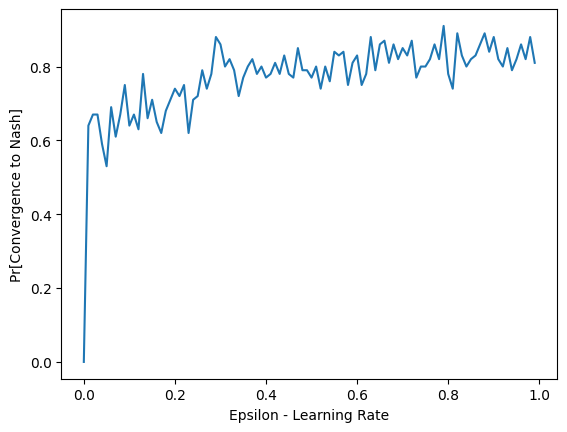

In [4]:
epsilons, results = test_learning_rates_for_EW(divisor=100)
plot_learning_rates_for_EW(epsilons, results)

<h3>Test For Learning Rates Between 0 and 1000</h3>

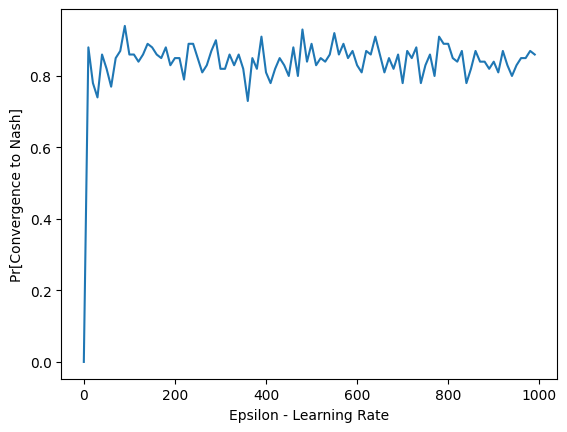

In [5]:
epsilons, results = test_learning_rates_for_EW(divisor=0.1)
plot_learning_rates_for_EW(epsilons, results)

<h1>Part 2</h1>

In [6]:
def get_expected_scores(A, B, eq):
    """
    It computes the expected score of each player given the equilibrium probabilities and the payoff
    matrices
    
    Args:
      A: the payoff matrix for player A
      B: the payoff matrix for player B
      eq: equilibrium distribution of the row and column players
    
    Returns:
      a_score: the expected score for A
      b_score: the expected score for B
    """
    pr_row_0 = eq[0][0]
    pr_row_1 = eq[0][1]
    pr_col_0 = eq[1][0]
    pr_col_1 = eq[1][1]
    score_A = pr_col_0 * (pr_row_0 * A[0][0] + pr_row_1 * A[1][0]) + pr_col_1 * (pr_row_0 * A[0][1] + pr_row_1 * A[1][1])
    score_B = pr_row_0 * (pr_col_0 * B[0][0] + pr_col_1 * B[0][1]) + pr_row_1 * (pr_col_0 * B[1][0] + pr_col_1 * B[1][1])

    return score_A, score_B

def winning_eq(A, B):
    """
    It finds the Nash equilibrium of the game, and then checks each equilibrium to see if it is a
    winning equilibrium for player A. If it is, it returns that equilibrium. If not, it returns the
    first Nash equilibrium
    
    Args:
      A: The payoff matrix for player A
      B: The payoff matrix for player B.
    
    Returns:
      The winning equilibrium.
    """
    eq = nash_eq(A, B)
    eq = [e for e in eq]
    winning_eq = eq[0]
    for e in eq:
        a_score, b_score = get_expected_scores(A, B, e)
        if a_score > b_score:
            winning_eq = e
            break
    return winning_eq

def beat_no_regret(A, B):
    """
    We play the game 25 times, and each time we pick an action for player A according to the winning
    equilibrium which favors A, and an action for player B according to the exponential weights algorithm. 
    
    We then check if player A's score is greater than player B's score. 
    
    If it is, we return True, otherwise we return False. 
    
    Args:
      A: the payoff matrix for player A
      B: payoff matrix for player B
    
    Returns:
      A boolean value.
    """
    ROUNDS = 25
    payoffs_B = np.zeros([2, ROUNDS])
    score_A = 0
    score_B = 0
    a_winning_eq = winning_eq(A, B)[0]
    for round in range(ROUNDS):
        action_A = random_pick(a_winning_eq)
        _, pi_B = exponential_weights(payoffs_B[:, 0:round+1], epsilon=1, h=10)
        action_B = random_pick(pi_B[:, round])
        payoffs_B[0][round] = B[action_A][0]
        payoffs_B[1][round] = B[action_A][1]
        score_A += A[action_A][action_B]
        score_B += B[action_A][action_B]
    return score_A > score_B

def test_beat_no_regret():
    """
    It generates a random game, and then checks whether the no-regret strategy beats the best response
    strategy
    
    Returns:
      The probability that the no-regret strategy beats the optimal strategy.
    """
    N = 10000
    wins = 0
    for _ in range(N):
        A, B = generate_random_game()
        if beat_no_regret(A, B):
            wins += 1
    return wins/N

In [7]:
print(f"Our strategy beats exponential weights {test_beat_no_regret()*100}% of the time")

Our strategy beats exponential weights 54.50000000000001% of the time
